### 1. Objective

The objective of this notebook is to clean up the data before further inferential statistical analysis and data modeling. The steps include checking missing values and outliers, examining variable types and encoding.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Load data and data conversion

There are **?** in the data set. Those values will be converted to NaN (missing values). In `gender`, there are **Unknown/Invalid** values which will be converted to NaN too.

In [2]:
df = pd.read_csv('./data/diabetic_data.csv', header=0)

# Replace “?” and “Unknown/Invalid” with NaN
replace_values = {'?': np.nan,
                 'Unknown/Invalid': np.nan}
df.replace(replace_values, inplace=True)

df.shape

(101766, 50)

In [3]:
df.gender.unique()

array(['Female', 'Male', nan], dtype=object)

In [4]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        99493 non-null object
gender                      101763 non-null object
age                         101766 non-null object
weight                      3197 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null object
medical_specialty           51817 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non

### 3. Re-label the response variable

The current response variable 'readmitted' has 3 categories: `<30`, `>30` and `NO`. This study is interested in those patients that are readmitted within 30 days after discharge. Then, the `<30` category was coded as 1, other two categories were coded as 0. 

In [6]:
# count the number of rows for each readmitted type
df.groupby('readmitted').size()

readmitted
<30    11357
>30    35545
NO     54864
dtype: int64

In [7]:
# create a new variable LABEL
df['LABEL'] = (df.readmitted == '<30').astype('int')
df['LABEL'] = df['LABEL'].astype('object')
df.drop('readmitted', axis=1, inplace=True)

In [8]:
sum(df.LABEL == 1)

11357

### 4. Check missing values

Check the percentage of missing values for each variable and observation. Three variables have `>39%` missing values: `weight`, `medical_specialty` and `payer_code`. Other variables have `<3%` missing values. The variable `weight` with `>50%` missing values were dropped. Before dropping variables, the highest percentage of missing values in observations is `10%`. This number decreases to `8%` after dropping variables. Currently keep the observations with missing values.

In [9]:
# check missing values in columns
(df.isnull().sum()*100/df.shape[0]).sort_values(ascending=False)[:10]

weight               96.858479
medical_specialty    49.082208
payer_code           39.557416
race                  2.233555
diag_3                1.398306
diag_2                0.351787
diag_1                0.020636
gender                0.002948
num_medications       0.000000
max_glu_serum         0.000000
dtype: float64

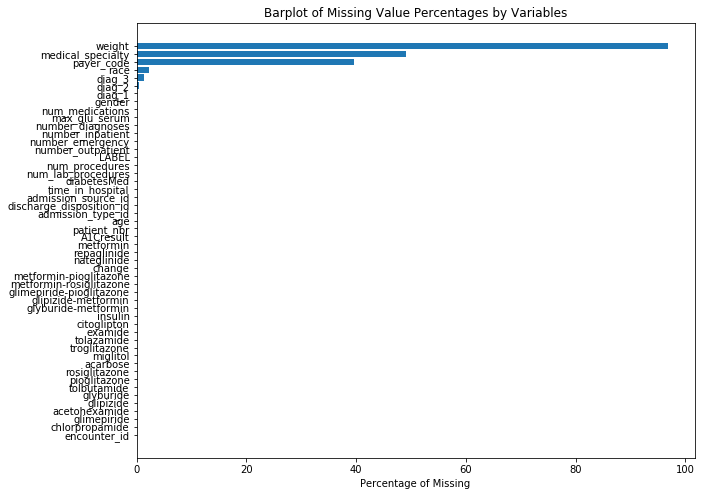

In [10]:
# plot the missing data
plt.figure(figsize=(10,8))
missing = pd.DataFrame({'column':df.columns ,'na_percent':df.isnull().sum()/len(df)*100})
missing.sort_values('na_percent',inplace=True)
plt.barh(missing['column'], width=missing['na_percent'])
plt.xlabel('Percentage of Missing')
plt.title('Barplot of Missing Value Percentages by Variables')
plt.show()

In [11]:
# check missing values in rows
(df.isnull().sum(axis=1)*100/df.shape[1]).sort_values(ascending=False)[:30]

3927     10.0
81437    10.0
62371    10.0
23475    10.0
48361    10.0
23870    10.0
29864    10.0
15752    10.0
8454     10.0
2794     10.0
7160     10.0
46031    10.0
2163     10.0
9351     10.0
66       10.0
14851    10.0
24636    10.0
24608    10.0
48002    10.0
23737    10.0
11893    10.0
87181    10.0
24139    10.0
32680    10.0
14355    10.0
15444    10.0
6538     10.0
54358    10.0
71507     8.0
12913     8.0
dtype: float64

In [12]:
# dropping columns with high NA percentage (>30%)
df.drop(['weight', 'medical_specialty', 'payer_code'], axis=1, inplace=True)

In [13]:
# check missing values in rows after dropping columns
(df.isnull().sum(axis=1)*100/df.shape[1]).sort_values(ascending=False)[:20]

27557    6.382979
27815    6.382979
29864    6.382979
23737    6.382979
33771    6.382979
32680    6.382979
28600    6.382979
28054    6.382979
28588    6.382979
29358    6.382979
36050    6.382979
34145    6.382979
81437    6.382979
87181    6.382979
32389    6.382979
67136    6.382979
25157    6.382979
21722    4.255319
2392     4.255319
25293    4.255319
dtype: float64

In [14]:
df.shape

(101766, 47)

### 5. Check outliers (numerical variables)

There are 8 numerical varaibles that will be check for outliers. There are no missing values but there are outliers in those 8 variables according to the boxplot of each numerical variable. Currently keep all those outliers in each variable

In [15]:
vars_num = ['time_in_hospital', 'num_procedures', 'number_diagnoses', 'num_medications', 
            'number_outpatient', 'number_inpatient','number_emergency', 'num_lab_procedures']

In [16]:
# there are no missing values in those 8 numerical varialbes
df[vars_num].isnull().sum()

time_in_hospital      0
num_procedures        0
number_diagnoses      0
num_medications       0
number_outpatient     0
number_inpatient      0
number_emergency      0
num_lab_procedures    0
dtype: int64

In [17]:
# a function to boxplot numerical columns
def bplot(df, cols):
    bpltdat = pd.melt(df, id_vars=['encounter_id'], 
                      value_vars = cols)
    bplot = sns.boxplot(y='value', x='variable', 
                        data=bpltdat, width=0.5, 
                        palette="colorblind")
    bplot.set_title('Boxplot of ' + ', '.join(cols))
    bplot.set_xlabel('')
    plt.show()

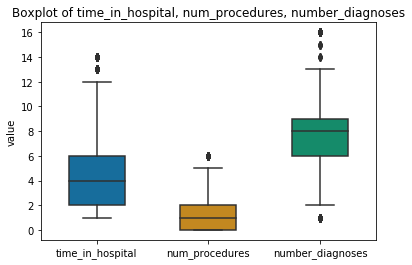

In [18]:
bplot(df, ['time_in_hospital', 'num_procedures', 'number_diagnoses'])

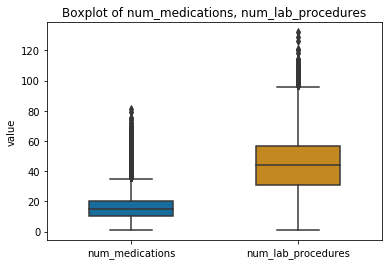

In [19]:
bplot(df, ['num_medications', 'num_lab_procedures'])

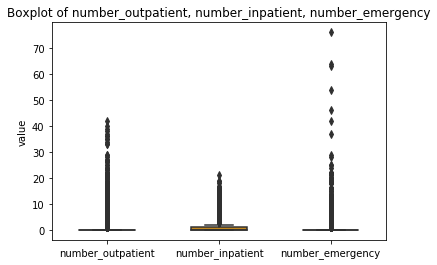

In [20]:
bplot(df, ['number_outpatient', 'number_inpatient','number_emergency'])

### 6. Explore/plot relationships between columns and LABEL column.

Scatterplot of variables `num_procedures`, `number_diagnoses`, `num_medications`,`num_lab_procedures`.

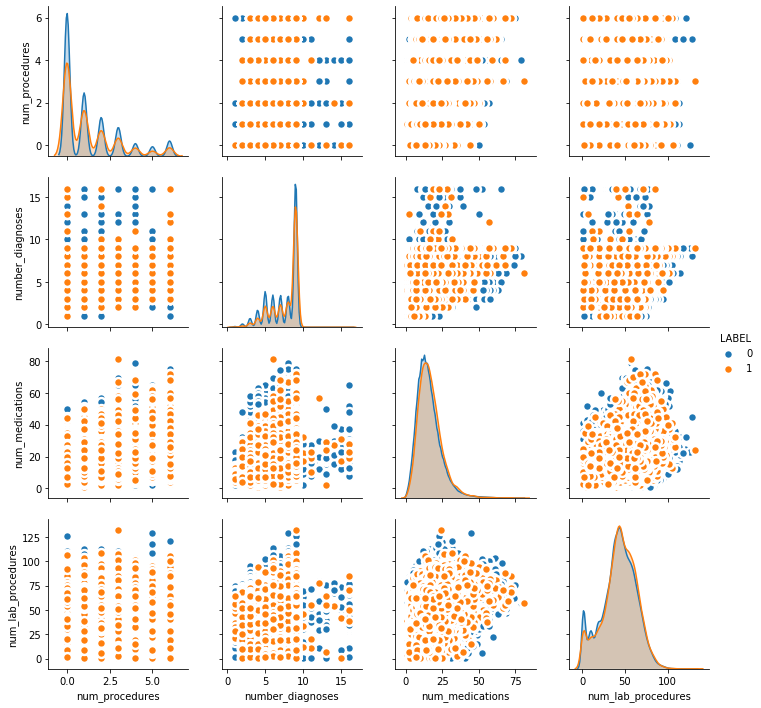

In [21]:
sns.pairplot(df[['num_procedures', 'number_diagnoses', 'num_medications','num_lab_procedures','LABEL']], 
             vars = ['num_procedures', 'number_diagnoses', 'num_medications','num_lab_procedures'],
             kind="scatter", hue="LABEL",  plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

Scatterplot of variables `number_outpatient`, `number_inpatient`, `number_emergency`,`num_lab_procedures`.

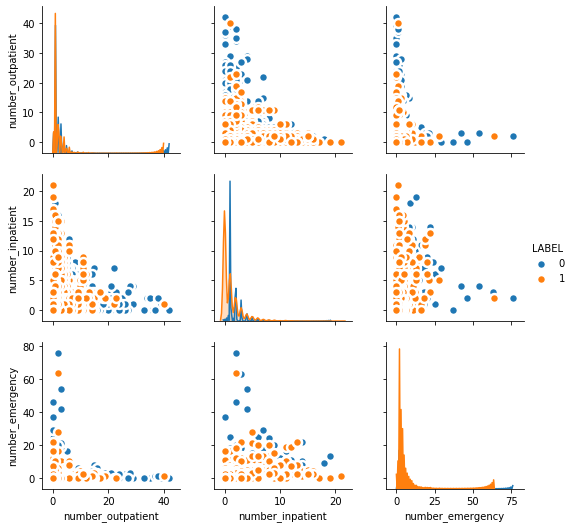

In [22]:
sns.pairplot(df[['number_outpatient', 'number_inpatient','number_emergency','LABEL']], 
             vars = ['number_outpatient', 'number_inpatient','number_emergency'],
             kind="scatter", hue="LABEL",  plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

Boxplot of numerical variables by category of LABEL

In [23]:
def bplot_label(df, col):
    bplot = sns.boxplot(y=col, x='LABEL', 
                        data=df, width=0.5, 
                        palette="colorblind")
    bplot.set_title(col + ' LABEL')
    plt.show()

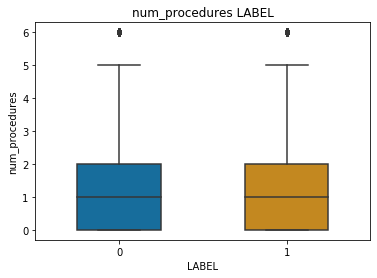

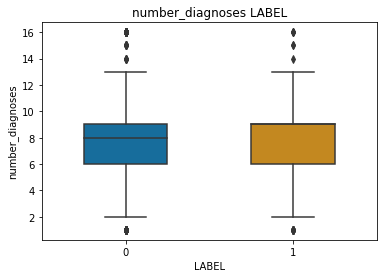

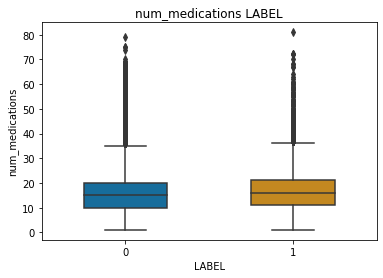

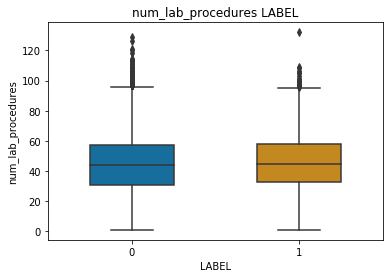

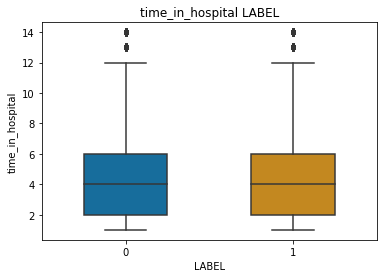

In [24]:
bplot_label(df, 'num_procedures')
bplot_label(df, 'number_diagnoses')
bplot_label(df, 'num_medications')
bplot_label(df, 'num_lab_procedures')
bplot_label(df, 'time_in_hospital')

Bar plot of  character variables `gender`, `age`, `race`, `discharge_disposition_id`, `max_glu_serum`, `A1Cresult` vs `LABEL`.

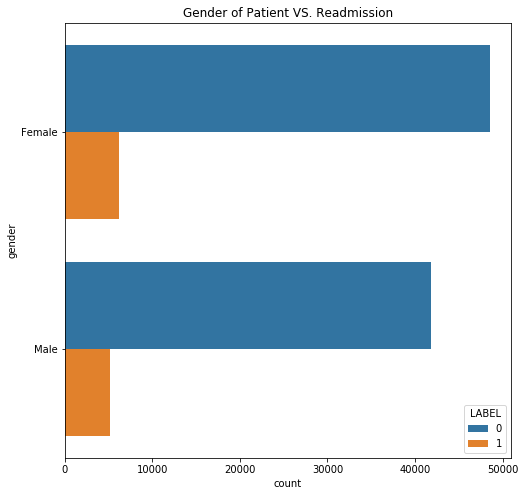

In [25]:
fig = plt.figure(figsize=(8, 8))
sns.countplot(y = df['gender'], hue = df['LABEL']).set_title('Gender of Patient VS. Readmission')
plt.show()

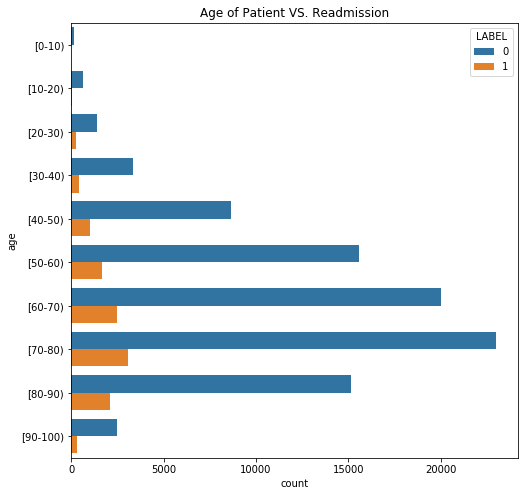

In [26]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['age'], hue = df['LABEL']).set_title('Age of Patient VS. Readmission')
plt.show()

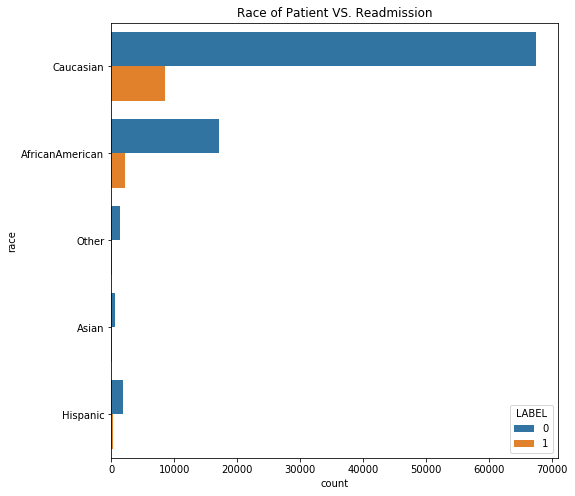

In [27]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['race'], hue = df['LABEL']).set_title('Race of Patient VS. Readmission')
plt.show()

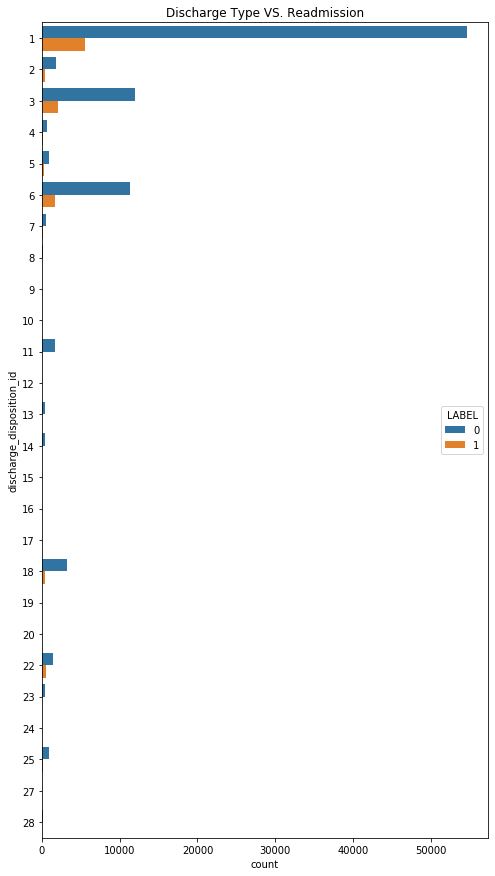

In [28]:
fig = plt.figure(figsize=(8,15))
sns.countplot(y = df['discharge_disposition_id'], hue = df['LABEL']).set_title('Discharge Type VS. Readmission')
plt.show()

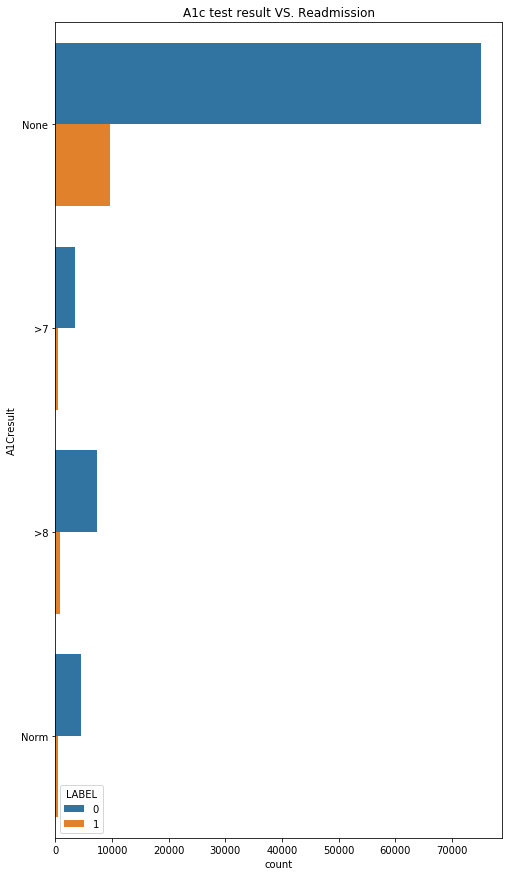

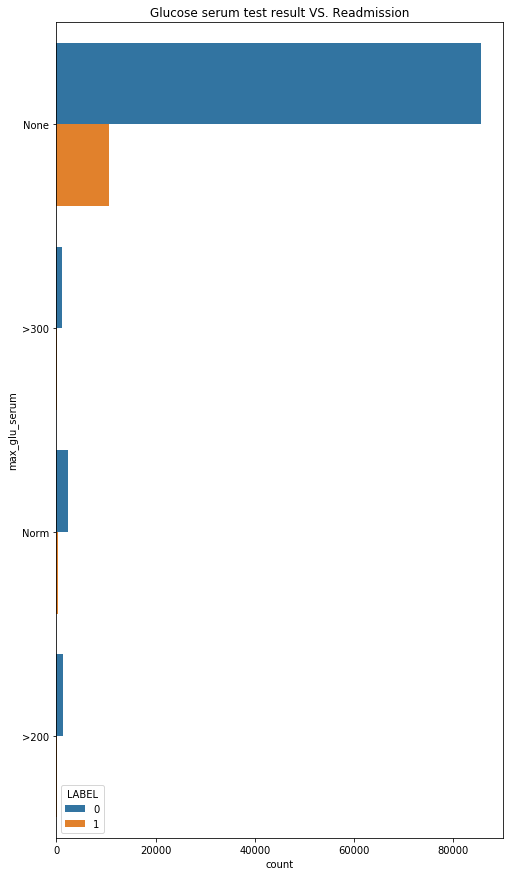

In [29]:
fig = plt.figure(figsize=(8,15))
sns.countplot(y = df['A1Cresult'], hue = df['LABEL']).set_title('A1c test result VS. Readmission')
plt.show()

fig = plt.figure(figsize=(8,15))
sns.countplot(y = df['max_glu_serum'], hue = df['LABEL']).set_title('Glucose serum test result VS. Readmission')
plt.show()

### 7. Examine categorical variables

There are several types of categorical variables:
 - `race`, `gender`, `age`. Those are basic demographic information.
 - `admission_type_id`, `discharge_disposition_id`, `admission_source_id` are numerical but they are IDs and should be treated as categorical.
 - `diag_1`, `diag_2`, `diag_3` have several hundred distinct values. Those could be dropped for analysis. Those diagnose information are partly captured in numerical variable `number_diagnoses`.
 - `max_glu_serum`, `A1Cresult`. Special lab test results.
 - 23 generic medications and a special one `diabetesMed`. `change` is a binary variable indicating whether there was a change in diabetic medications (either dosage or generic name).

`age` is a categorical variable but in order. It is better to covert it to numerical variable.

In [30]:
df['age'] = df['age'].str[1:].str.split('-', expand=True)[0]
df['age'] = df['age'].astype(int)

In [31]:
# convert numerical varialbes to categorical variable
df[['admission_type_id', 'discharge_disposition_id', 'admission_source_id']] = df[['admission_type_id', 'discharge_disposition_id', 'admission_source_id']].astype('object')

In [32]:
vars_cat = df.columns.values[(df.dtypes == 'object').values]

In [33]:
def get_cat_levels(col):
    return pd.DataFrame({'Variable': [col], 'Levels': [len(df[col].unique())]})

In [34]:
# lsit of categorical variables and their number of levels
pd.concat(map(get_cat_levels, vars_cat)).sort_values(by=['Levels'], ascending=False)

,Variable,Levels
0,diag_3,790
0,diag_2,749
0,diag_1,717
0,discharge_disposition_id,26
0,admission_source_id,17
0,admission_type_id,8
0,race,6
0,glipizide,4
0,insulin,4
0,miglitol,4


In [35]:
# drop variables with only 1 level and variables with > 50 levels
df.drop(['diag_1', 'diag_2', 'diag_3', 'examide', 'citoglipton'], axis=1, inplace=True)

In [36]:
vars_cat = list(df.columns.values[(df.dtypes == 'object').values])

In [37]:
# one hot encoding
final = pd.get_dummies(df, columns = vars_cat, drop_first = True)

In [38]:
final.shape

(101766, 121)

### 8. Summary

The final cleaned data set has 136 variables:
 - **9** numerical variables
 - **125** categorical varialbes
 - **1** patient number variable
 - **1** response variable

In [39]:
file_name = 'data/diabetic_data_clean.csv'
final.to_csv(file_name)